<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_31_hypothesis_testing_cars_weight_origin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Question**
Does the average acceleration differ between cars from the USA, Europe, and Japan?

---

### **Hypotheses**:
- **Null Hypothesis (H₀)**:  
  The mean acceleration is the same across all origin groups (USA, Europe, Japan).  
  *In other words, origin has no effect on the average acceleration of cars.*

- **Alternative Hypothesis (H₁)**:  
  At least one origin group has a different mean acceleration.  
  *In other words, the mean acceleration differs between at least two origins.*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene

# Load the dataset
cars = sns.load_dataset('mpg')

# Print the number of unique values for each column
unique_counts = cars.nunique()

# Define a threshold for unique values to classify as categorical
threshold = 10

# Identify columns to convert to categorical
categorical_cols = unique_counts[unique_counts < threshold].index.tolist()

# Convert suitable columns to category
for col in categorical_cols:
    cars[col] = cars[col].astype('category')

# Verify the changes
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    category
 8   name          398 non-null    object  
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 23.0+ KB
None


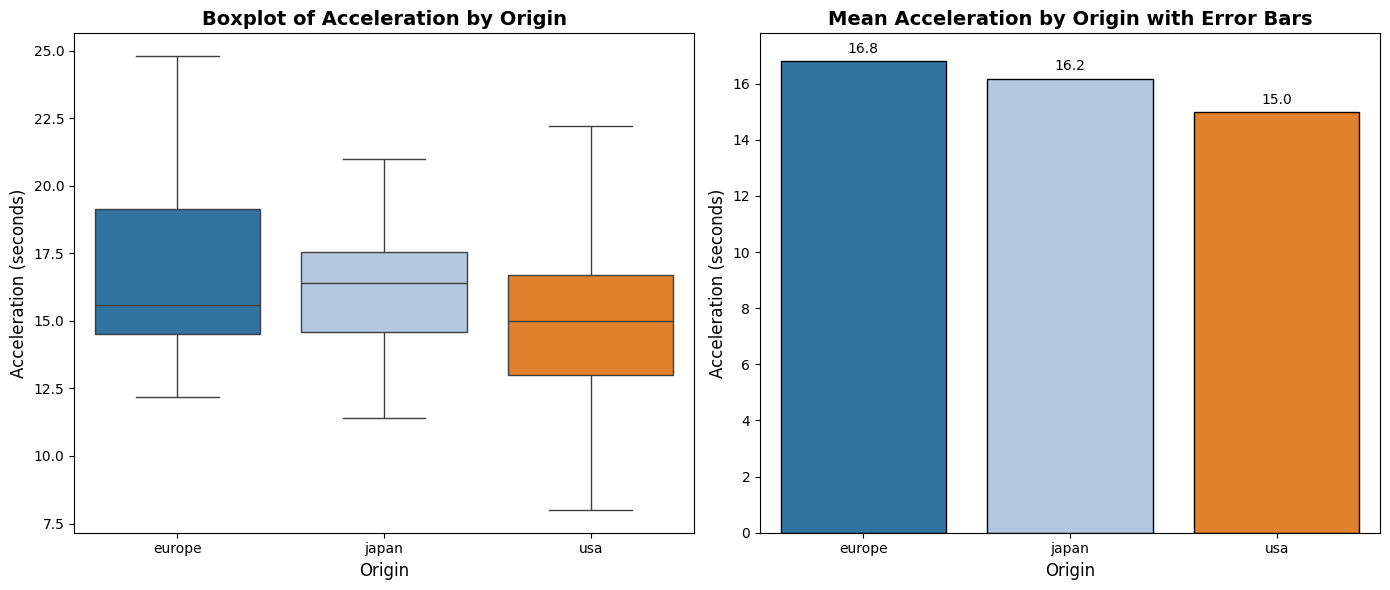

In [ ]:
# Calculate the means, standard deviations, and counts for acceleration by origin
group_stats = cars.groupby('origin', observed=True)['acceleration'].agg(['mean', 'std', 'count']).reset_index()
group_stats['error'] = group_stats['std'] / group_stats['count']**0.5  # Standard error of the mean

# Define the color palette
palette = sns.color_palette("tab20", n_colors=3)

# Set up the figure with a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Boxplot
sns.boxplot(data=cars, x='origin', y='acceleration', hue='origin', palette=palette, ax=axes[0])
axes[0].set_title('Boxplot of Acceleration by Origin', fontsize=14, weight='bold')
axes[0].set_xlabel('Origin', fontsize=12)
axes[0].set_ylabel('Acceleration (seconds)', fontsize=12)

# Plot 2: Barplot with Error Bars
sns.barplot(data=group_stats, x='origin', y='mean', hue='origin', palette=palette, ax=axes[1], edgecolor='black', errorbar=None)

# # Add error bars to the barplot
# for index, row in group_stats.iterrows():
#     axes[1].errorbar(x=index, y=row['mean'], yerr=row['error'], fmt='none', c='black', capsize=5)

# Add data labels to the barplot
for index, row in group_stats.iterrows():
    axes[1].text(index, row['mean'] + 0.3, f"{row['mean']:.1f}", ha='center', fontsize=10)

axes[1].set_title('Mean Acceleration by Origin with Error Bars', fontsize=14, weight='bold')
axes[1].set_xlabel('Origin', fontsize=12)
axes[1].set_ylabel('Acceleration (seconds)', fontsize=12)
axes[1].set_ylim(0, group_stats['mean'].max() + 1)  # Adjust y-axis for labels

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import levene

# Group acceleration by origin
usa_accel = cars[cars['origin'] == 'usa']['acceleration']
europe_accel = cars[cars['origin'] == 'europe']['acceleration']
japan_accel = cars[cars['origin'] == 'japan']['acceleration']

# Perform Levene's Test
levene_stat, levene_p = levene(usa_accel, europe_accel, japan_accel)
print(f"Levene's Test Statistic: {levene_stat:.2f}")
print(f"P-Value: {levene_p:.4f}")

# Interpretation
if levene_p < 0.05:
    print("\nReject the Null Hypothesis: Variances in acceleration differ across origin groups.")
else:
    print("\nFail to Reject the Null Hypothesis: Variances in acceleration are similar across origin groups.")

# Perform Welch's ANOVA
welch_anova = pg.welch_anova(data=cars, dv='acceleration', between='origin')
print(welch_anova)

# Interpretation
if welch_anova['p-unc'][0] < 0.05:
    print("\nReject the Null Hypothesis: The mean acceleration differs significantly across origin groups.")
else:
    print("\nFail to Reject the Null Hypothesis: The mean acceleration is the same across origin groups.")
print('\n')

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=cars['acceleration'], groups=cars['origin'], alpha=0.05)
print(tukey)

Levene's Test Statistic: 4.27
P-Value: 0.0146

Reject the Null Hypothesis: Variances in acceleration differ across origin groups.
   Source  ddof1       ddof2          F     p-unc      np2
0  origin      2  147.823502  14.486697  0.000002  0.07143

Reject the Null Hypothesis: The mean horsepower differs significantly across origin groups.


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
europe  japan   -0.622 0.3364 -1.6593  0.4154  False
europe    usa  -1.8039    0.0 -2.6634 -0.9444   True
 japan    usa  -1.1819 0.0019 -1.9933 -0.3706   True
----------------------------------------------------


### **Interpretation of the Results**

#### **1. Levene's Test for Variances**
- **Test Statistic**: 4.27  
- **P-Value**: 0.0146  
  - The p-value is below the significance threshold (\( \alpha = 0.05 \)), so we **reject the null hypothesis**.
  - **Conclusion**: The variances in acceleration differ significantly across the `origin` groups.

---

#### **2. Welch’s ANOVA**
- **F-Statistic**: 14.49  
- **P-Value**: 0.000002  
  - The p-value is far below \( alpha = 0.05 \), so we **reject the null hypothesis**.
  - **Conclusion**: The mean acceleration differs significantly across the `origin` groups.
- **Effect Size (\( eta^2_p \))**: 0.071  
  - Approximately 7.1% of the variability in acceleration is explained by the differences between the origin groups. This is a small-to-moderate effect size.

---

#### **3. Tukey’s HSD Test (Post-Hoc Analysis)**

##### Key Findings:
1. **Europe vs. Japan**:
   - **Mean Difference**: -0.62  
   - \( p = 0.3364 \): Not significant.  
   - **Conclusion**: No significant difference in mean acceleration between Europe and Japan.

2. **Europe vs. USA**:
   - **Mean Difference**: -1.80  
   - \( p = 0.0000 \): Highly significant.  
   - **Conclusion**: Cars from the USA have significantly slower acceleration compared to cars from Europe.

3. **Japan vs. USA**:
   - **Mean Difference**: -1.18  
   - \( p = 0.0019 \): Highly significant.  
   - **Conclusion**: Cars from the USA have significantly slower acceleration compared to cars from Japan.

---

### **Key Insights**
1. **Variances**:
   - Variances in acceleration differ significantly across origins, which justifies the use of Welch’s ANOVA.

2. **Mean Acceleration**:
   - **USA cars** have the slowest mean acceleration, significantly slower than both Europe and Japan.
   - **Europe and Japan cars** have similar mean acceleration.

3. **Effect Size**:
   - The differences between origins explain about 7.1% of the variability in acceleration, indicating a small-to-moderate relationship.





## **Question**:
Is there a significant relationship between a car's weight and its acceleration?

---

### **Testing Weight and Acceleration**

#### **Hypotheses**:
- **Null Hypothesis (H₀):**  
  There is no relationship between weight and acceleration.  
  *In other words, the correlation between weight and acceleration is zero.*

- **Alternative Hypothesis (H₁):**  
  There is a relationship between weight and acceleration.  
  *In other words, the correlation between weight and acceleration is not zero.*

---

#### **Testing Approach**:
1. **Pearson Correlation**:
   - If the relationship is **linear**, use the Pearson correlation coefficient to test for a significant correlation.
2. **Spearman Correlation**:
   - If the relationship is **non-linear**, use the Spearman rank correlation as a non-parametric alternative.
3. **Visualization**:
   - Use a scatterplot with a regression line to visually explore the relationship.

In [4]:
from scipy.stats import pearsonr, spearmanr

# Drop missing values for weight and acceleration
cars_clean = cars.dropna(subset=['weight', 'acceleration'])

# Calculate Pearson Correlation
pearson_corr, pearson_p = pearsonr(cars_clean['weight'], cars_clean['acceleration'])
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")
print(f"Pearson P-Value: {pearson_p:.4f}")

# Calculate Spearman Correlation
spearman_corr, spearman_p = spearmanr(cars_clean['weight'], cars_clean['acceleration'])
print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"Spearman P-Value: {spearman_p:.4f}")

# Interpretation
alpha = 0.05
if pearson_p < alpha:
    print("\nReject the Null Hypothesis: There is a significant linear relationship between weight and acceleration.")
else:
    print("\nFail to Reject the Null Hypothesis: There is no significant linear relationship between weight and acceleration.")

if spearman_p < alpha:
    print("\nReject the Null Hypothesis: There is a significant monotonic relationship between weight and acceleration.")
else:
    print("\nFail to Reject the Null Hypothesis: There is no significant monotonic relationship between weight and acceleration.")


Pearson Correlation Coefficient: -0.42
Pearson P-Value: 0.0000
Spearman Correlation Coefficient: -0.40
Spearman P-Value: 0.0000

Reject the Null Hypothesis: There is a significant linear relationship between weight and acceleration.

Reject the Null Hypothesis: There is a significant monotonic relationship between weight and acceleration.


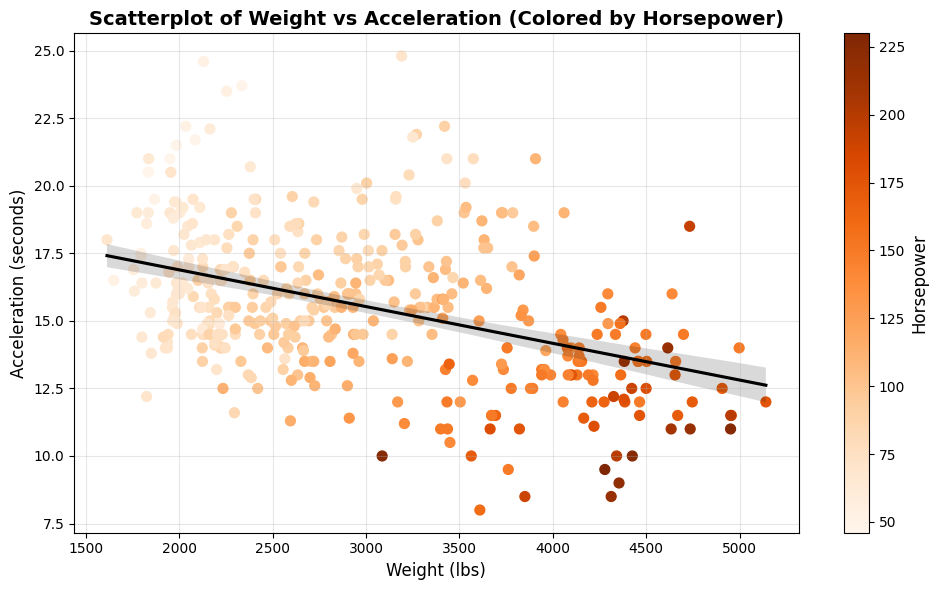

In [15]:
# Create a scatterplot with color scale
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=cars_clean['weight'],
    y=cars_clean['acceleration'],
    c=cars_clean['horsepower'],  # Color scale based on horsepower
    cmap='Oranges', s=50 # edgecolor='k',  Color map
)

# Add the regression line
sns.regplot(
    data=cars_clean, x='weight', y='acceleration', scatter=False, line_kws={'color': 'k'}
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Horsepower', fontsize=12)

# Add titles and labels
plt.title('Scatterplot of Weight vs Acceleration (Colored by Horsepower)', fontsize=14, weight='bold')
plt.xlabel('Weight (lbs)', fontsize=12)
plt.ylabel('Acceleration (seconds)', fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

## **Question**:
Is there a significant relationship between a car's acceleration and its mpg?

---

#### **Hypotheses**:
- **Null Hypothesis (H₀):**  
  There is no relationship between acceleration and mpg.  
  *In other words, the correlation between acceleration and mpg is zero.*

- **Alternative Hypothesis (H₁):**  
  There is a relationship between acceleration and mpg.  
  *In other words, the correlation between acceleration and mpg is not zero.*

---

#### **Testing Approach**:
1. **Correlation Analysis**:
   - Calculate both Pearson and Spearman correlation coefficients to test for a linear or monotonic relationship.
2. **Visualization**:
   - Create an enhanced scatterplot, similar to the one for `weight` and `acceleration`, with a regression line and a color scale.

In [6]:
from scipy.stats import pearsonr, spearmanr

# Calculate Pearson Correlation
pearson_corr, pearson_p = pearsonr(cars_clean['acceleration'], cars_clean['mpg'])
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")
print(f"Pearson P-Value: {pearson_p:.4f}")

# Calculate Spearman Correlation
spearman_corr, spearman_p = spearmanr(cars_clean['acceleration'], cars_clean['mpg'])
print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"Spearman P-Value: {spearman_p:.4f}")

# Interpretation
alpha = 0.05
if pearson_p < alpha:
    print("\nReject the Null Hypothesis: There is a significant linear relationship between acceleration and mpg.")
else:
    print("\nFail to Reject the Null Hypothesis: There is no significant linear relationship between acceleration and mpg.")

if spearman_p < alpha:
    print("\nReject the Null Hypothesis: There is a significant monotonic relationship between acceleration and mpg.")
else:
    print("\nFail to Reject the Null Hypothesis: There is no significant monotonic relationship between acceleration and mpg.")


Pearson Correlation Coefficient: 0.42
Pearson P-Value: 0.0000
Spearman Correlation Coefficient: 0.44
Spearman P-Value: 0.0000

Reject the Null Hypothesis: There is a significant linear relationship between acceleration and mpg.

Reject the Null Hypothesis: There is a significant monotonic relationship between acceleration and mpg.


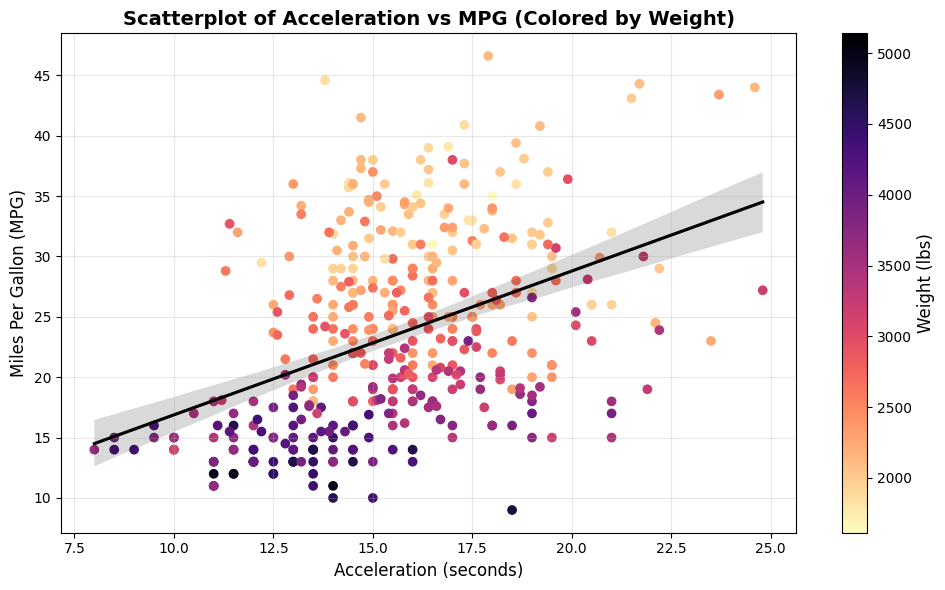

In [18]:
# Enhanced scatterplot with color scale
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=cars_clean['acceleration'],
    y=cars_clean['mpg'],
    c=cars_clean['weight'],  # Color scale based on weight
    cmap='magma_r',         # Choose an appropriate colormap
    # alpha=0.7,
    # edgecolor='k'
)

# Add the regression line
sns.regplot(
    data=cars_clean, x='acceleration', y='mpg', scatter=False, line_kws={'color': 'k'}
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Weight (lbs)', fontsize=12)

# Add titles and labels
plt.title('Scatterplot of Acceleration vs MPG (Colored by Weight)', fontsize=14, weight='bold')
plt.xlabel('Acceleration (seconds)', fontsize=12)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


### **Interpretation of the Results**

#### **1. Pearson Correlation**
- **Correlation Coefficient (\( r \))**: 0.42  
  - Indicates a **moderate positive linear relationship** between acceleration and mpg.
  - As acceleration increases (i.e., cars accelerate faster), mpg tends to increase as well.
- **P-Value**: 0.0000  
  - The p-value is far below \( \alpha = 0.05 \), so we **reject the null hypothesis**.
  - **Conclusion**: There is a statistically significant linear relationship between acceleration and mpg.

---

#### **2. Spearman Correlation**
- **Correlation Coefficient (\( \rho \))**: 0.44  
  - Indicates a **moderate positive monotonic relationship** between acceleration and mpg.
  - This suggests the relationship holds regardless of whether it’s perfectly linear.
- **P-Value**: 0.0000  
  - The p-value is far below \( \alpha = 0.05 \), so we **reject the null hypothesis**.
  - **Conclusion**: There is a statistically significant monotonic relationship between acceleration and mpg.

---

### **Key Insights**
1. **Moderate Positive Relationship**:
   - Faster acceleration is associated with higher mpg. This relationship could be due to cars with better acceleration often being more efficient or advanced in design, or simply lighter in weight.

2. **Both Linear and Monotonic Relationships**:
   - The Pearson and Spearman results are consistent, indicating the relationship is both linear and monotonic (but doesn’t have to be perfectly linear).

3. **Practical Implications**:
   - Cars with faster acceleration tend to be more fuel-efficient, which might reflect differences in car designs (e.g., lighter weight, advanced engines).

